<a href="https://colab.research.google.com/github/yasaswini-devi-2004/Machine_Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1: Admission Prediction
Accuracy: 0.66
              precision    recall  f1-score   support

         0.0       0.69      0.91      0.78        53
         1.0       0.50      0.19      0.27        27

    accuracy                           0.66        80
   macro avg       0.59      0.55      0.53        80
weighted avg       0.62      0.66      0.61        80



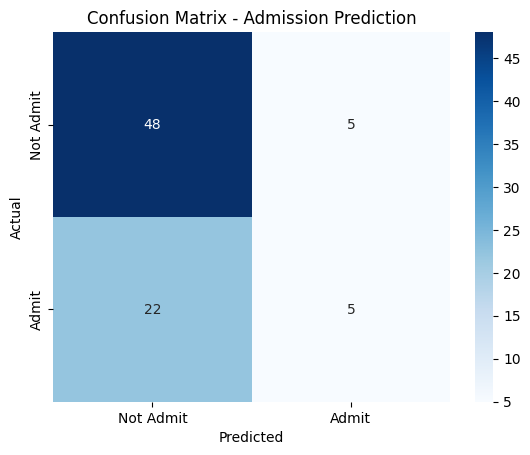

In [1]:
# Exercise 1
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
url1 = 'https://stats.idre.ucla.edu/stat/stata/dae/binary.dta'
data1 = pd.read_stata(url1)

# Convert categorical 'rank' to dummy variables
data1 = pd.get_dummies(data1, columns=['rank'], drop_first=True)

# Features and target
X1 = data1.drop('admit', axis=1)
y1 = data1['admit']

# Train-test split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Logistic Regression model
model1 = LogisticRegression(max_iter=1000)
model1.fit(X1_train, y1_train)

# Prediction and evaluation
y1_pred = model1.predict(X1_test)
print("Problem 1: Admission Prediction")
print(f"Accuracy: {accuracy_score(y1_test, y1_pred):.2f}")
print(classification_report(y1_test, y1_pred))

cm1 = confusion_matrix(y1_test, y1_pred)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Admit', 'Admit'], yticklabels=['Not Admit', 'Admit'])
plt.title('Confusion Matrix - Admission Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Problem 2: Medical Disease Susceptibility
Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       0.94      0.83      0.88        18

    accuracy                           0.93        60
   macro avg       0.93      0.90      0.92        60
weighted avg       0.93      0.93      0.93        60



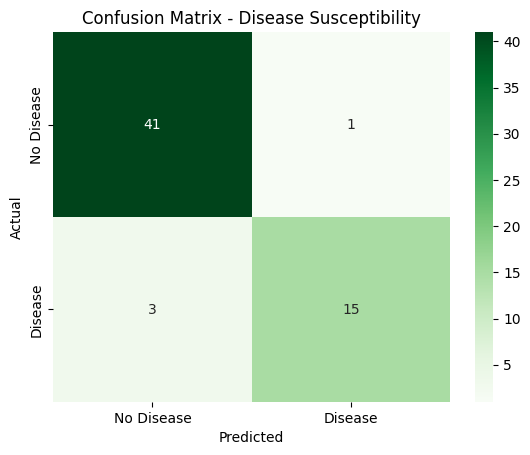

In [2]:
# Exercise 2
import numpy as np

# Simulated dataset for medical susceptibility
np.random.seed(42)
n = 300

# Features: age, cholesterol level
age = np.random.randint(20, 80, n)
cholesterol = np.random.randint(150, 300, n)

# Target: disease (1) or no disease (0), some nonlinear relation
disease = ((age > 50) & (cholesterol > 220)).astype(int)

# Create DataFrame
data2 = pd.DataFrame({'age': age, 'cholesterol': cholesterol, 'disease': disease})

# Features and target
X2 = data2[['age', 'cholesterol']]
y2 = data2['disease']

# Train-test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Logistic Regression model
model2 = LogisticRegression(max_iter=1000)
model2.fit(X2_train, y2_train)

# Prediction and evaluation
y2_pred = model2.predict(X2_test)
print("Problem 2: Medical Disease Susceptibility")
print(f"Accuracy: {accuracy_score(y2_test, y2_pred):.2f}")
print(classification_report(y2_test, y2_pred))

cm2 = confusion_matrix(y2_test, y2_pred)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Disease Susceptibility')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Problem 3: Product Purchase Prediction
Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.98      0.98      0.98        41
           2       0.95      0.95      0.95        38

    accuracy                           0.95       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.95      0.95      0.95       100



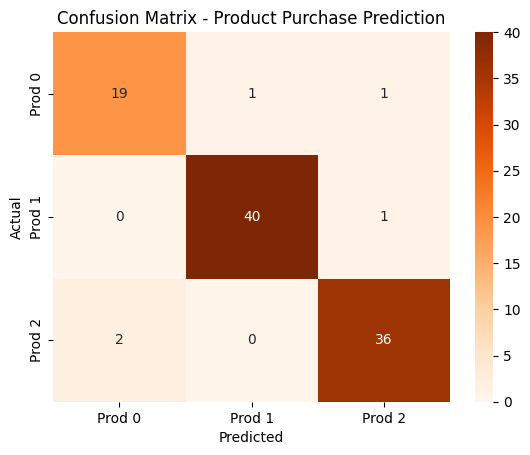

In [3]:
# Exercise 3
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Simulate data: features like customer_age, browsing_time, previous_purchases
np.random.seed(42)
n3 = 500

customer_age = np.random.randint(18, 70, n3)
browsing_time = np.random.uniform(1, 30, n3)  # minutes
previous_purchases = np.random.randint(0, 20, n3)

# Target product category: 3 classes (0,1,2)
# Simple logic: product 0 for young & low browsing, product 1 for mid age & mid browsing, product 2 for older or high browsing
product = np.where(customer_age < 30, 0,
           np.where(browsing_time < 15, 1, 2))

# Create DataFrame
data3 = pd.DataFrame({
    'customer_age': customer_age,
    'browsing_time': browsing_time,
    'previous_purchases': previous_purchases,
    'product': product
})

# Features and target
X3 = data3.drop('product', axis=1)
y3 = data3['product']

# Scale features
scaler = StandardScaler()
X3_scaled = scaler.fit_transform(X3)

# Train-test split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_scaled, y3, test_size=0.2, random_state=42)

# Multi-class logistic regression (softmax)
model3 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model3.fit(X3_train, y3_train)

# Predict and evaluate
y3_pred = model3.predict(X3_test)
print("Problem 3: Product Purchase Prediction")
print(f"Accuracy: {accuracy_score(y3_test, y3_pred):.2f}")
print(classification_report(y3_test, y3_pred))

cm3 = confusion_matrix(y3_test, y3_pred)
sns.heatmap(cm3, annot=True, fmt='d', cmap='Oranges', xticklabels=['Prod 0', 'Prod 1', 'Prod 2'], yticklabels=['Prod 0', 'Prod 1', 'Prod 2'])
plt.title('Confusion Matrix - Product Purchase Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Shape of dataset: (768, 9)
   pregnant  glucose   bp  skin  insulin   bmi  pedigree  age  label
0         6      122   42    83       38  34.5     0.131   63      1
1        14      173   65    17       25  16.4     1.397   64      0
2        10      173  111    33      108  38.3     2.143   29      0
3         7      108   87    50      215  26.3     2.398   33      0
4         6      136  105    45       35  46.4     1.458   35      0
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.53      0.48        72
           1       0.51      0.43      0.46        82

    accuracy                           0.47       154
   macro avg       0.48      0.48      0.47       154
weighted avg       0.48      0.47      0.47       154

Confusion Matrix:
[[38 34]
 [47 35]]


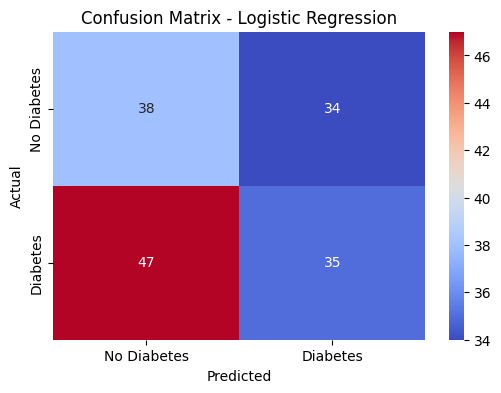

In [4]:
#Example problem
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

# 1. Generate random dataset
np.random.seed(42)
n_samples = 768

data = pd.DataFrame({
    'pregnant': np.random.randint(0, 17, size=n_samples),
    'glucose': np.random.randint(70, 200, size=n_samples),
    'bp': np.random.randint(40, 122, size=n_samples),
    'skin': np.random.randint(10, 99, size=n_samples),
    'insulin': np.random.randint(15, 276, size=n_samples),
    'bmi': np.round(np.random.uniform(15.0, 50.0, size=n_samples), 1),
    'pedigree': np.round(np.random.uniform(0.1, 2.5, size=n_samples), 3),
    'age': np.random.randint(21, 80, size=n_samples),
    'label': np.random.randint(0, 2, size=n_samples)  # Binary target: 0 or 1
})

print("Shape of dataset:", data.shape)
print(data.head())

# 2. Split dataset
X = data.drop('label', axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)

# 5. Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 6. Plot confusion matrix
plt.figure(figsize=(6,4))
sn.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
